In [8]:
import pandas as pd
import quandl

In [39]:
QUANDL_KEY = 'VMuJREsX2yY4_McfSNj9'
quandl.ApiConfig.api_key = QUANDL_KEY


df = quandl.get(dataset='YALE/NHPI',
               start_date = '2010-01-01',
               end_date = '2019-12-31')

df.rename(columns={'Index': 'price'}, inplace = True)
df = df.resample('M').last()

1.import the libraries

In [40]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

2. Define a function for running the ADF test

In [44]:
def adf_test(x):
    indices = ['Test Statistic', 'p-value'
              '# of Lags Used', '# of Observation Used']
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:3], index = indices)
    
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value
        
    return results

In [45]:
adf_test(df.price)

Test Statistic            0.136814
p-value# of Lags Used     0.968487
# of Observation Used    13.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64

3. Define a function for running the KPSS test:

In [47]:
def kpss_test(x, h0_type='c'):
    indices = ['Test Statistic', 'p-value', '# of lags']
    
    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)
    
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value
        
    return results

In [48]:
kpss_test(df.price)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic            0.928901
p-value                   0.010000
# of lags                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

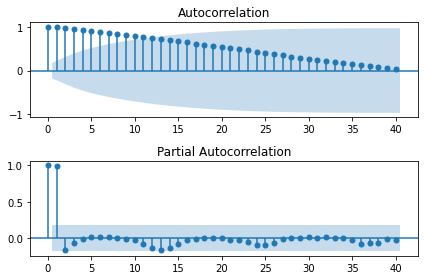

In [49]:
import matplotlib.pyplot as plt

N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05

fig, ax= plt.subplots(2,1)
plot_acf(df.price, ax=ax[0], lags=N_LAGS,
        alpha=SIGNIFICANCE_LEVEL)
plot_pacf(df.price, ax = ax[1], lags= N_LAGS,
         alpha=SIGNIFICANCE_LEVEL)

plt.tight_layout()
plt.show()